___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../figures/capa2.png"/></a>
___

# Projeto de máquinas vetoriais de suporte

Bem-vindo ao seu projeto de máquina de vetores de suporte! Basta seguir o caderno e as instruções abaixo. Estaremos analisando o famoso conjunto de dados de íris!

## Os dados
Para esta série de palestras, usaremos o famoso [conjunto de dados da flor Iris](http://en.wikipedia.org/wiki/Iris_flower_data_set).

O conjunto de dados da flor Iris ou conjunto de dados Fisher's Iris é um conjunto de dados multivariados introduzido por Sir Ronald Fisher em 1936 como um exemplo de análise discriminante.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor), totalizando 150 amostras. Quatro características foram medidas de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

Aqui está uma imagem dos três tipos diferentes de íris:

- Iris_setosa

<img src='http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg' width=300/>


- Iris_versicolor

<img src='http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg' width=300/>

- Iris_virginica

<img src='http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg' width=300/>

O conjunto de dados da íris contém medições para 150 flores de íris de três espécies diferentes.

As três classes no conjunto de dados Iris:

     Íris-setosa (n=50)
     Íris-versicolor (n=50)
     Íris virgem (n=50)

As quatro características do conjunto de dados Iris:

     comprimento da sépala em cm
     largura da sépala em cm
     comprimento da pétala em cm
     largura da pétala em cm

## Obter os dados

**Use seaborn para obter os dados da íris usando: `iris = sns.load_dataset('iris')`**

In [24]:
import seaborn as sns
iris = sns.load_dataset('iris')

Vamos visualizar os dados e começar!

## Análise exploratória de dados

Hora de testar suas habilidades de visualização de dados! Tente recriar os gráficos a seguir, certifique-se de importar as bibliotecas necessárias!

**Importe algumas bibliotecas que você acha que vai precisar.**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Crie um gráfico de pairplot do conjunto de dados. Qual espécie de flor parece ser a mais separável?**

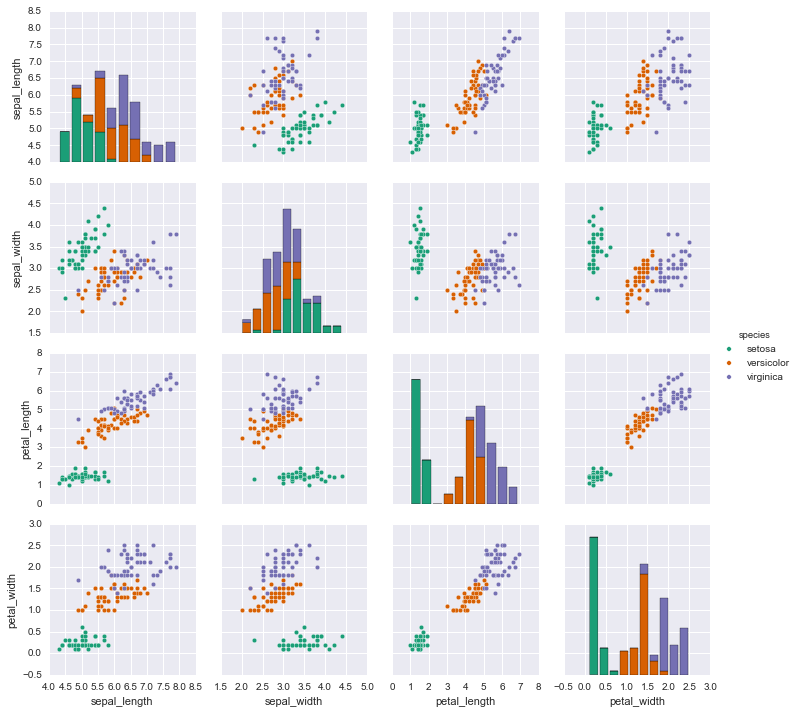

In [37]:
# Setosa is the most separable. 
sns.pairplot(iris,hue='species',palette='Dark2')

**Crie um gráfico `kde` de `sepal_length` versus `epal width` para espécies de flores setosa.**

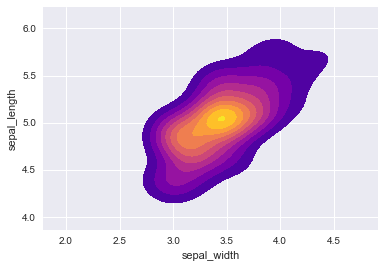

In [44]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

**Divida seus dados em um conjunto de treinamento e um conjunto de teste.**

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Treinar um modelo

Agora é hora de treinar um classificador de máquina de vetores de suporte.

**Chame o modelo `SVC()` do sklearn e ajuste o modelo aos dados de treinamento.**

In [48]:
from sklearn.svm import SVC

In [49]:
svc_model = SVC()

In [50]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação do modelo

**Agora obtenha previsões do modelo e crie uma matriz de confusão e um relatório de classificação.**

In [51]:
predictions = svc_model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [54]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



Uau! Você deve ter notado que seu modelo era muito bom! Vamos ver se podemos ajustar os parâmetros para tentar ficar ainda melhor (improvável, e você provavelmente ficaria satisfeito com esses resultados em reais porque o conjunto de dados é muito pequeno, mas eu só quero que você pratique usando o `GridSearch`.

## Prática de Gridsearch

**Importe `GridsearchCV` do SciKit Learn.**

In [55]:
from sklearn.model_selection import GridSearchCV

**Crie um dicionário chamado `param_grid` e preencha alguns parâmetros para `C` e `gamma`.**

In [57]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

** Crie um objeto `GridSearchCV` e ajuste-o aos dados de treinamento.**

In [58]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

**Agora pegue esse modelo de grade e crie algumas previsões usando o conjunto de teste e crie relatórios de classificação e matrizes de confusão para eles. Você conseguiu melhorar?**

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [61]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



Você deveria ter feito quase o mesmo ou exatamente o mesmo, isso faz sentido, há basicamente apenas um ponto que é muito barulhento para agarrar, o que faz sentido, não queremos ter um modelo overfit que seria capaz de agarrar isso .

## Bom Trabalho!